___
# PROJETO 2

## Matheus Pamplona
___

In [64]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Matheus\Documents\GitHub\CDAgoraVai\aula15


In [65]:
anos = pd.read_excel('Life.xlsx',sep=',')

___
## 1. Seleção dos três anos com diferentes formatos de distribuição da expectativa de vida

In [66]:
d1 = pd.DataFrame()

d1['A1800'] = sorted(anos.A1800)
d1['A1929'] = sorted(anos.A1929)
d1['A2000'] = sorted(anos.A2000)

d1 =  d1.dropna()

d1.A1800 = sorted(d1.A1800)
d1.A1929 = sorted(d1.A1929)
d1.A2000 = sorted(d1.A2000)



___
## 2. Análise Descritiva

In [67]:
faixa1 = np.arange(10,50,3)
faixa2 = np.arange(20,70,3)
faixa3 = np.arange(40,90,3)

In [110]:
d1.A1800.describe()

count    169.000000
mean      30.830625
std        3.368846
min       23.387000
25%       28.799000
50%       31.000000
75%       33.000000
max       39.860000
Name: A1800, dtype: float64

In [111]:
d1.A1929.describe()

count    169.000000
mean      34.900085
std        7.812735
min       23.387000
25%       30.252000
50%       32.300000
75%       38.164640
max       62.190000
Name: A1929, dtype: float64

In [112]:
d1.A2000.describe()

count    169.000000
mean      66.773586
std        9.027696
min       45.700000
25%       60.000000
50%       69.300000
75%       73.900000
max       82.700000
Name: A2000, dtype: float64

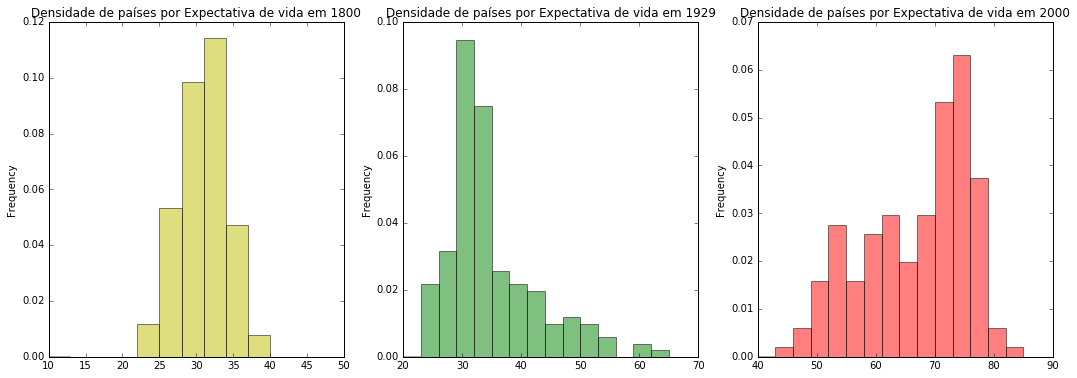

In [113]:
plt.subplot(1,3,1)
plot = d1.A1800.plot.hist(title='Densidade de países por Expectativa de vida em 1800', color = ('y'), figsize=(18, 6), normed = 1, alpha = 0.5 , bins = faixa1)
plt.subplot(1,3,2)
plot = d1.A1929.plot.hist(title='Densidade de países por Expectativa de vida em 1929', color = ('g'),  figsize=(18, 6), normed = 1, alpha = 0.5, bins = faixa2)
plt.subplot(1,3,3)
plot = d1.A2000.plot.hist(title='Densidade de países por Expectativa de vida em 2000', color = ('r'),  figsize=(18, 6), normed = 1, alpha = 0.5, bins = faixa3)
plt.show()

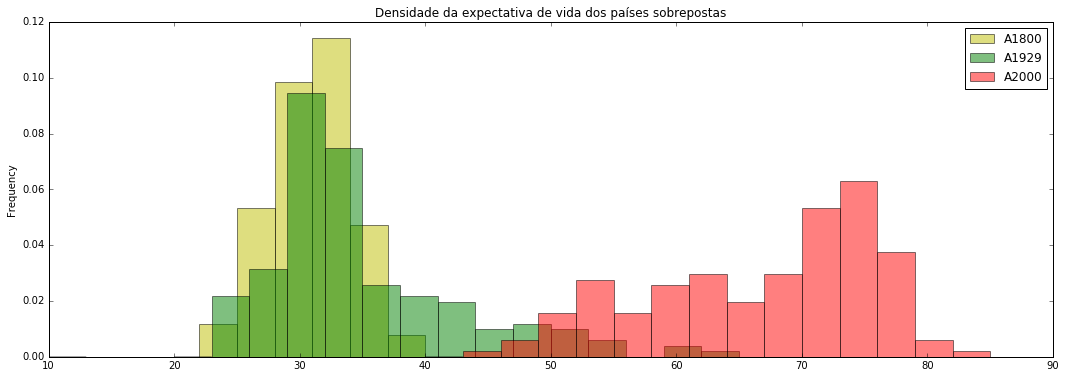

In [116]:
plot = d1.A1800.plot.hist(title='', color = ('y'), figsize=(18, 6), normed = 1, alpha = 0.5 , bins = faixa1)
plot = d1.A1929.plot.hist(title='', color = ('g'),  figsize=(18, 6), normed = 1, alpha = 0.5, bins = faixa2)
plot = d1.A2000.plot.hist(title='Densidade da expectativa de vida dos países sobrepostas', color = ('r'),  figsize=(18, 6), normed = 1, alpha = 0.5, bins = faixa3)
plt.legend()
plt.show()

(15, 90)

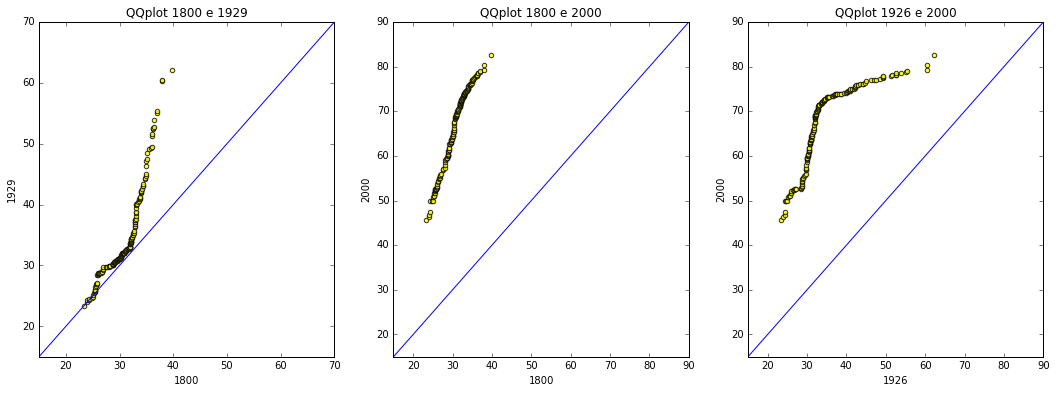

In [74]:
fig = plt.figure(figsize=(18, 6))
plt.subplot(131)
plt.scatter(d1.A1800, d1.A1929, c='yellow', alpha=0.8)
plt.title('QQplot 1800 e 1929')
plt.xlabel('1800')
plt.ylabel('1929')
plt.plot((7,70),(7,70))
plt.ylim(15,70)
plt.xlim(15,70)

plt.subplot(132)
plt.scatter(d1.A1800, d1.A2000, c='yellow', alpha=0.8)
plt.title('QQplot 1800 e 2000')
plt.xlabel('1800')
plt.ylabel('2000')
plt.plot((7,90),(7,90))
plt.ylim(15,90)
plt.xlim(15,90)

plt.subplot(133)
plt.scatter(d1.A1929, d1.A2000, c='yellow', alpha=0.8)
plt.title('QQplot 1926 e 2000')
plt.xlabel('1926')
plt.ylabel('2000')
plt.plot((7,90),(7,90))
plt.ylim(15,90)
plt.xlim(15,90)

### Aderência de um modelo probabilístico normal aos dados

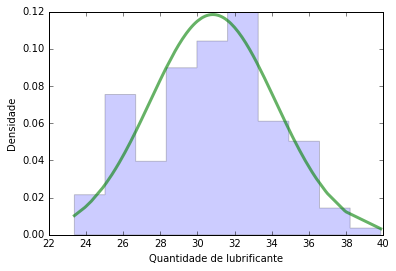

In [75]:
sigma1800 = 3.36884610
mu1800 =  30.830625

#x = sorted(stats.norm.rvs(size=10000, loc=mu, scale=sigma))

plt.hist(d1.A1800, normed=1, histtype='stepfilled', alpha=0.2)
plt.plot(d1.A1800, stats.norm.pdf(d1.A1800, loc=mu1800, scale=sigma1800), lw=3, alpha=0.6)
plt.title('')
plt.xlabel('Quantidade de lubrificante')
plt.ylabel('Densidade')

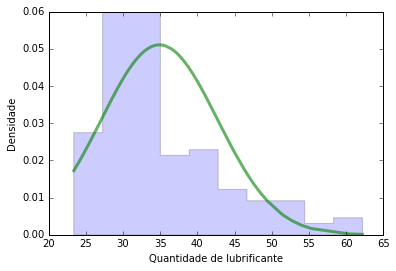

In [76]:
sigma1929 = 7.812735
mu1929 =  34.900085

#x = sorted(stats.norm.rvs(size=10000, loc=mu, scale=sigma))

plt.hist(d1.A1929, normed=1, histtype='stepfilled', alpha=0.2)
plt.plot(d1.A1929, stats.norm.pdf(d1.A1929, loc=mu1929, scale=sigma1929), lw=3, alpha=0.6)
plt.title('')
plt.xlabel('Quantidade de lubrificante')
plt.ylabel('Densidade')

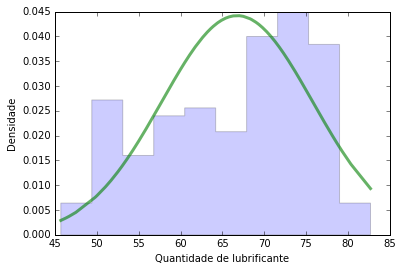

In [77]:
sigma2000 = 9.027696
mu2000 =  66.773586

#x = sorted(stats.norm.rvs(size=10000, loc=mu, scale=sigma))

plt.hist(d1.A2000, normed=1, histtype='stepfilled', alpha=0.2)
plt.plot(d1.A2000, stats.norm.pdf(d1.A2000, loc=mu2000, scale=sigma2000), lw=3, alpha=0.6)
plt.title('')
plt.xlabel('Quantidade de lubrificante')
plt.ylabel('Densidade')

___
### Aderência de um modelo probabilístico assimétrico aos dados

In [78]:
mu_exp1800 = d1.A1800.mean()
mu_exp1929 = d1.A1929.mean()
mu_exp2000 = d1.A2000.mean()

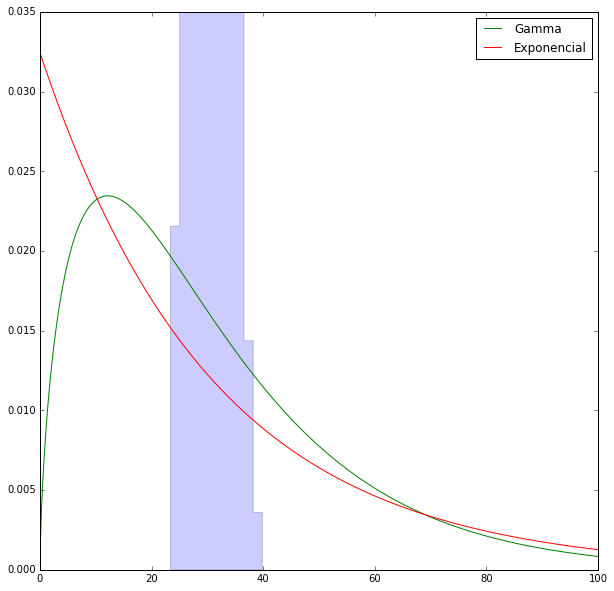

In [91]:
x1800 = np.linspace(0, 100, 1000)

fig = plt.figure(figsize=(10,10))
k_gamma1800 = 0.8

# Estimamos theta da distribuição gamma
theta_gamma1800 = mu1800/k_gamma

# histograma e densidade teórica
plt.hist(d1.A1800, normed=1, histtype='stepfilled', alpha=0.2)
exponencial = stats.expon.pdf(x1800, scale=mu_exp1800)
gamma = stats.gamma.pdf(x1800, scale=theta_gamma1800, loc=0, a=k_gamma)
plt.plot(x1800, gamma, '-', color='green', label="Gamma") # Plota a gamma teórica
plt.plot(x1800, exponencial, '-', color='red', label="Exponencial") # Plota a exponencial teórica

plt.legend()

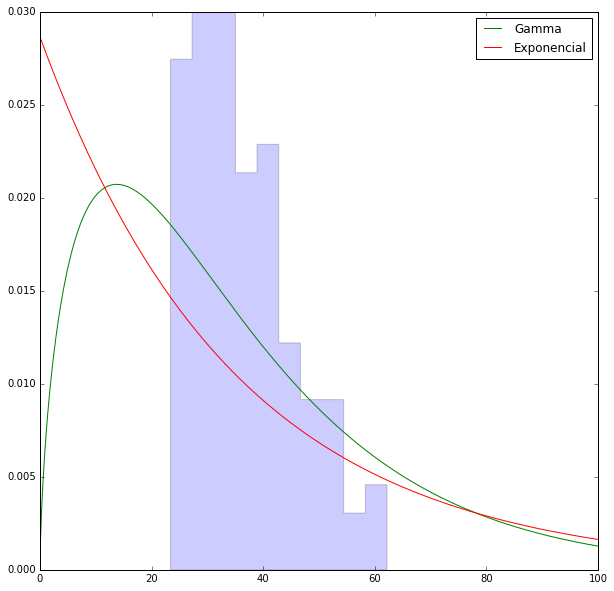

In [88]:
x1929 = np.linspace(0, 100, 1000)

fig = plt.figure(figsize=(10,10))
k_gamma1929 = 1.65

# Estimamos theta da distribuição gamma
theta_gamma1929 = mu1929/k_gamma

# histograma e densidade teórica
plt.hist(d1.A1929, normed=1, histtype='stepfilled', alpha=0.2)
exponencial = stats.expon.pdf(x1929, scale=mu_exp1929)
gamma = stats.gamma.pdf(x1929, scale=theta_gamma1929, loc=0, a=k_gamma)
plt.plot(x1929, gamma, '-', color='green', label="Gamma") # Plota a gamma teórica
plt.plot(x1929, exponencial, '-', color='red', label="Exponencial") # Plota a exponencial teórica

plt.legend()

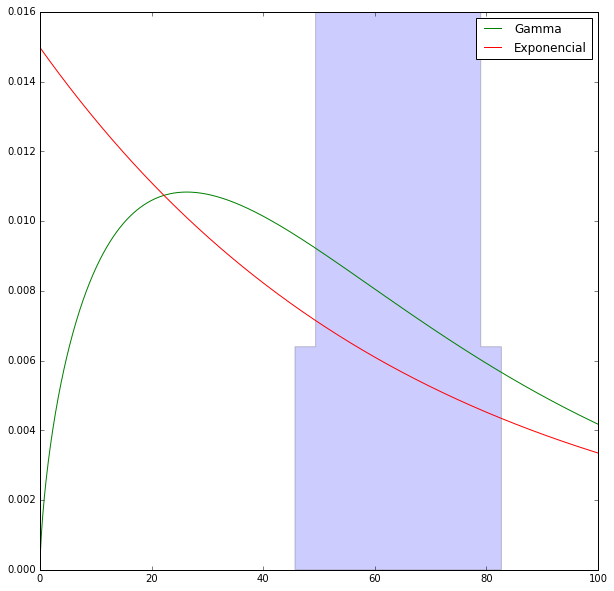

In [89]:
x2000 = np.linspace(0, 100, 1000)

fig = plt.figure(figsize=(10,10))
k_gamma2000 = 1.65

# Estimamos theta da distribuição gamma
theta_gamma2000 = mu2000/k_gamma

# histograma e densidade teórica
plt.hist(d1.A2000, normed=1, histtype='stepfilled', alpha=0.2)
exponencial = stats.expon.pdf(x2000, scale=mu_exp2000)
gamma = stats.gamma.pdf(x2000, scale=theta_gamma2000, loc=0, a=k_gamma)
plt.plot(x2000, gamma, '-', color='green', label="Gamma") # Plota a gamma teórica
plt.plot(x2000, exponencial, '-', color='red', label="Exponencial") # Plota a exponencial teórica

plt.legend()

___
### Cálculo de probabilidades a partir da distribuição normal

In [108]:
#Probabilidade do Exemplo 2 a partir da variável X
#P(X > 70)=
p70 = 1 - stats.norm.cdf(70, loc=mu2000, scale=sigma2000)
print("probabilidade de expec de vida ser maior que 70 anos:")
print(pmaior)

#prob dado de ser menor que 75% dado que é maior que 70 anos

p75 = ((stats.norm.cdf(75, loc=mu2000, scale=sigma2000)) - (stats.norm.cdf(70, loc=mu2000, scale=sigma2000)))/ p70
print("prob dado de ser menor que 75% dado que é maior que 70 anos:")
print(p75)

#maior espectativa de vida dos 10 % de paises com menores espectativas de vida

#menor espectativa de vida dos 10 % de paises com maiores espectativas de vida

probabilidade de expec de vida ser maior que 70 anos:
0.360399693572
prob dado de ser menor que 75% dado que é maior que 70 anos:
0.49754676831
